# **Superdense Coding Protocol**

### **Introduction**

This code implements the superdense coding protocol using Qiskit, a quantum computing framework in Python. Superdense coding is a quantum communication protocol that exploits the principles of quantum entanglement and superposition to transmit two bits of classical information using only one quantum bit. In this implementation, I delve into the principle of superdense coding using Qiskit, showcasing how quantum bits (qubits) can be harnessed for high-capacity information transfer.

### **Overview of Superdense Coding**

Superdense coding protocol involves two distant parties, the sender (**Alice**) and the receiver (**Bob**), aiming to transmit two bits of classical information using shared entangled qubits. The key steps of the superdense coding protocol are elucidated below:

1. **Quantum and Classical Register Initialization:**
        Entangled qubits are assigned to Alice (**A**) and Bob (**B**), along with a pair of random qubits (**random**) representing the classical message.
        Two classical registers are established for both Alice (**a1**, **a2**) and Bob (**b1**, **b2**) to store measurement outcomes.

2. **Random Message Initialization:**
        A random classical message is prepared with **random** qubits using Hadamard (**H**) gates and stored into Alice's register (**a1**, **a2**)
        
3. **Entanglement Generation:**
        Hadamard (**H**) and controlled-X (**CX**) gates are employed to generate entanglement between Alice's (**A**) and Bob's (**B**)qubits.

4. **Encoding Information:**
        Quantum gates (**Z** and **X** gates) are conditionally applied based on the random classical message, allowing for efficient encoding onto the entangled qubit **A**.

5. **Decoding Information:**
        Additional controlled-X (**CX**)  and Hadamard (**H**) operations are implemented for decoding the transmitted classical information.
        
6. **Measurement:**
        Final measurements of entangled qubits (**A** and **B**) are conducted, and outcomes are recorded in classical registers (**b1** and **b2**) for Bob.
        
7. **Simulation and Visualization:**
        The quantum circuit is simulated using a quantum simulator, and the resulting measurement statistics are visualized through a histogram.

### **Mathematical Analysis**

The superdense coding protocol involves quantum gates and measurements, which can be mathematically described using the principles of quantum mechanics. Let's break down the key mathematical aspects of the superdense coding process:

1. **Entangled State Initialization:**

The entangled state **∣Φ+⟩** is established using a pair of qubits, typically denoted as **A** and **B**, through the application of Hadamard (**H**) and controlled-X (**CX**) gates:

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|0\rangle \otimes |0\rangle + |1\rangle \otimes |1\rangle)
$$

2. **Randomization of message:**

Random classical bits **a1** and **a2** are generated through the measurement of qubits **R0** and **R1** initialized with Hadamard gates (**H**):

$$
|Psi_R\rangle = H|R_0\rangle \cdot H|R_1\rangle
$$

Measurements of qubits **R0** and **R1** are stored in classical bits **a1** and **a2** initializing classical register **a** with random message:

$$
a1 = \langle R_0\rangle
$$
$$
a2 = \langle R_1\rangle
$$

3. **Message Encoding:**

The classical bits **a1** and **a2** are used to apply Pauli-X (**X**) and Pauli-Z (**Z**) gates to the entangled state **∣Φ+⟩**, creating the encoded state **∣Ψ⟩**:



$$
|\Psi\rangle = (X^{a1} \cdot Z^{a2}) \cdot |\Phi^+\rangle
$$

3. **Decoding by Bob:**

To decode the message, the recipient applies Controlled-X (**CX**) and Hadamard (**H**) gates:

$$
|\Psi'\rangle = C_X|\Psi\rangle \cdot H|\Psi\rangle
$$

The decoding measurement results in classical bits **b1** and **b2**:

$$
b1 = \langle\Psi'|B\rangle
$$
$$
b2 = \langle\Psi'|A\rangle
$$


6. **Simulation and Measurement Statistics:**

The test circuit is simulated, and the measurement statistics are obtained. The probability distribution of outcomes is then visualized through histograms.

### **Prerequisites**

To run the provided code, you need the following Python libraries:

- Qiskit

Ensure that you have these libraries installed before executing the code.

### **Code Overview**
1. **Import necessary libraries**

These imports bring in the required functionalities for Qiskit and visualization.

In [1]:
# Import necessary libraries from Qiskit and other modules

from qiskit import *
from qiskit.visualization import plot_histogram

2. **Initialization of Quantum and Classical Registers**

The superdense coding protocol involves the use of quantum registers to store qubits and classical registers for measurement outcomes. The code initializes quantum registers for the entangled qubits (**ebit0** and **ebit1**) and a quantum register to randomize sent transfered message (**random**), along with classical registers (**a** and **b**) to store measurement results.

In [2]:
# Define quantum registers for entangled qubits (ebit0 and ebit1) and random qubits (random)
ebit0 = QuantumRegister(1, 'A')
ebit1 = QuantumRegister(1, 'B')
random = QuantumRegister(2, 'R')

# Define classical registers for Alice's measurements (a1 and a2) and Bob's measurements (b1 and b2)
a1 = ClassicalRegister(1, 'a1')
a2 = ClassicalRegister(1, 'a2')
b1 = ClassicalRegister(1, 'b1')
b2 = ClassicalRegister(1, 'b2')

# Create a quantum circuit named 'circuit' using the defined registers
circuit = QuantumCircuit(ebit0, ebit1, random, a1, a2, b1, b2)

# Uncomment the line below to display the initial circuit diagram
# display(circuit.draw(output='mpl', style="iqp"))

3. **Initialize Random Message to be Sent**

A random classical message is created with the **random** qubits using Hadamard gates and stored in register **a1** and **a2**

In [3]:
# Initialize random message to be sent
circuit.h(random[0])
circuit.h(random[1])
circuit.measure(random[0], a1)
circuit.measure(random[1], a2)

# Uncomment the line below to display the circuit diagram
# display(circuit.draw(output='mpl', style="iqp"))

3. **Entanglement Generation**

Hadamard (**H**) gate and controlled-X (**CX**) gate operations are performed to create entanglement between **ebit0** and **ebit1**.

In [4]:
# Apply Hadamard gate to create entanglement in ebit0
circuit.h(ebit0)

# Apply controlled-X gate to entangle ebit0 and ebit1
circuit.cx(ebit0, ebit1)

# Add a barrier to visually separate different stages of the circuit
circuit.barrier()

# Uncomment the line below to display the circuit diagram
# display(circuit.draw(output='mpl', style="iqp"))

4. **Encoding Information**

Quantum gates (**Z** and **X**) are applied conditionally based on the random classical message in register **a1** and **a2**.

In [5]:
# Perform corrections on the entangled qubit (ebit0) based on received classical bits
circuit.z(ebit0).c_if(a2, 1)
circuit.x(ebit0).c_if(a1, 1)

# Add a barrier to visually separate different stages of the circuit
circuit.barrier()

# Uncomment the line below to display the circuit diagram
# display(circuit.draw(output='mpl', style="iqp"))

5. **Decoding Information**

Additional controlled-X (**CX**) and Hadamard (**H**) operations are applied to the qubit **ebit0** for decoding received message.

In [6]:
# Perform additional CX and H operations for decoding incoming message
circuit.cx(ebit0, ebit1)
circuit.h(ebit0)

# Add a barrier to visually separate different stages of the circuit
circuit.barrier()

# Uncomment the line below to display the circuit diagram
# display(circuit.draw(output='mpl', style="iqp"))

6. **Measurement**

Final measurements of **ebit1** and **ebit0** are performed, and outcomes are stored in classical registers **b1** and **b2** for Bob.

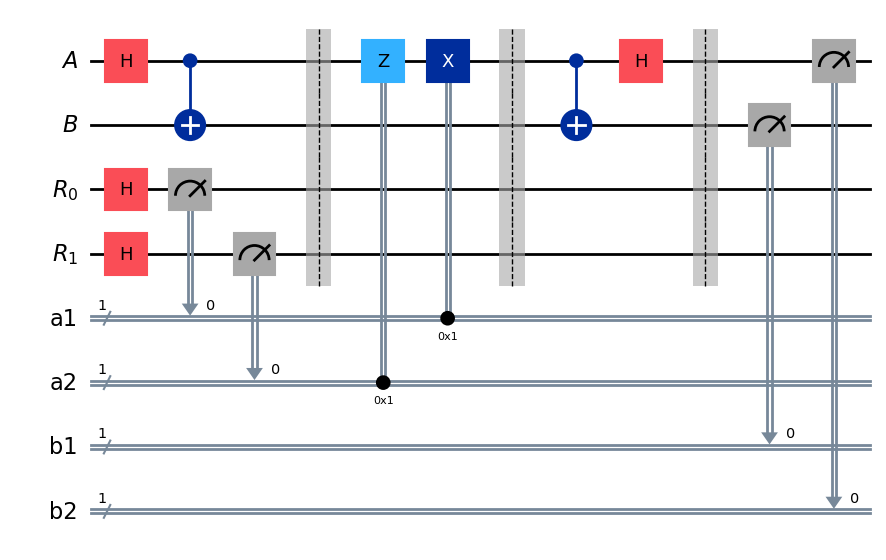

In [7]:
# Perform measurements on entangled qubits and store results in classical registers
circuit.measure(ebit1, b1)
circuit.measure(ebit0, b2)

display(circuit.draw(output='mpl', style="iqp"))

7. **Simulation and Visualization**

The circuit is executed on a quantum simulator, and measurement statistics are retrieved and visualized through a histogram.

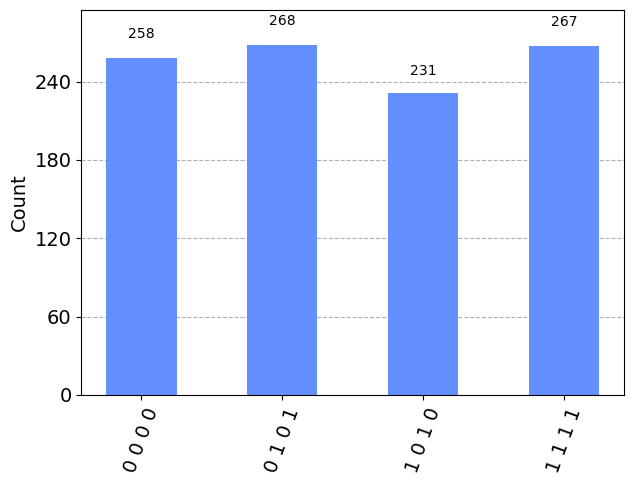

In [8]:
# Run the simulation and retrieve measurement statistics
simulator = Aer.get_backend('qasm_simulator')
test2 = execute(circuit, backend=simulator, shots=1024).result()
statistics = test2.get_counts(circuit)

# Display histogram of measurement statistics
display(plot_histogram(statistics))

Bits on histogram above are ordered in **b2 b1 a2 a1** manner. And you can see that corresponding bits **a1-b1** and **a2-b2** always carry the same information. Therefore transfer has been successful.

### **Conclusion**

In summary, this documentation provides a comprehensive guide to implementing the superdense coding protocol using Qiskit. Superdense coding, a quantum communication technique leveraging entanglement, efficiently transmits classical information. The code segments cover key stages, including register initialization, entangled state creation, information transfer, measurements, and corrections. Users can gain practical insights into quantum circuitry for superdense coding, contributing to the exploration of quantum communication applications. This document serves as resource for my understanding and implementing superdense coding with Qiskit.